<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Belajar_Association_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Kasus: Analisis Data Penjualan Supermarket

Dalam studi kasus ini, kita akan menganalisis data penjualan supermarket untuk memahami pola pembelian pelanggan dan memprediksi penjualan di masa depan. Kita akan melakukan:

Pre-processing data untuk persiapan analisis.
Association Rule Mining untuk menemukan pola produk yang sering dibeli bersama.
Regresi Linear untuk memprediksi total penjualan berdasarkan fitur tertentu.
Visualisasi menggunakan seaborn dan matplotlib untuk memahami data dengan lebih baik.
Kita akan menggunakan dataset "Supermarket Sales" yang tersedia di Kaggle.

Data Set : https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk association rule mining
from mlxtend.frequent_patterns import apriori, association_rules

# Untuk regresi linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Menampilkan beberapa baris pertama
print(data.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Pre-processing
# Mengubah kolom 'Date' menjadi datetime
data['Date'] = pd.to_datetime(data['Date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Feature Engineering
# Menambahkan kolom hari, bulan, dan tahun
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Association Rule Mining
# Membuat basket untuk setiap transaksi
basket = data.groupby(['Invoice ID', 'Product line'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice ID')

# Mengubah kuantitas menjadi format biner
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-d6013cb698d7>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [8]:
# Menerapkan Algoritma Apriori
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
# Menghasilkan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.head())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Regresi Linear
# Memilih fitur dan target
features = ['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income']
X = data[features]
y = data['Total']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Membangun model regresi linear
lr = LinearRegression()
lr.fit(X_train, y_train)

# Melakukan prediksi
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Evaluasi model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 8.39267539342824e-27
R^2 Score: 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


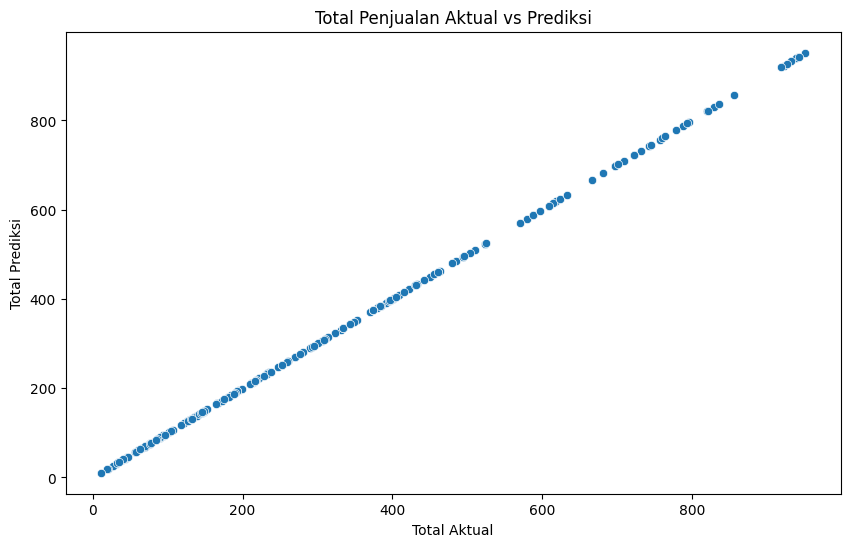

In [14]:
# Visualisasi
# Plot aktual vs prediksi
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Total Aktual')
plt.ylabel('Total Prediksi')
plt.title('Total Penjualan Aktual vs Prediksi')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


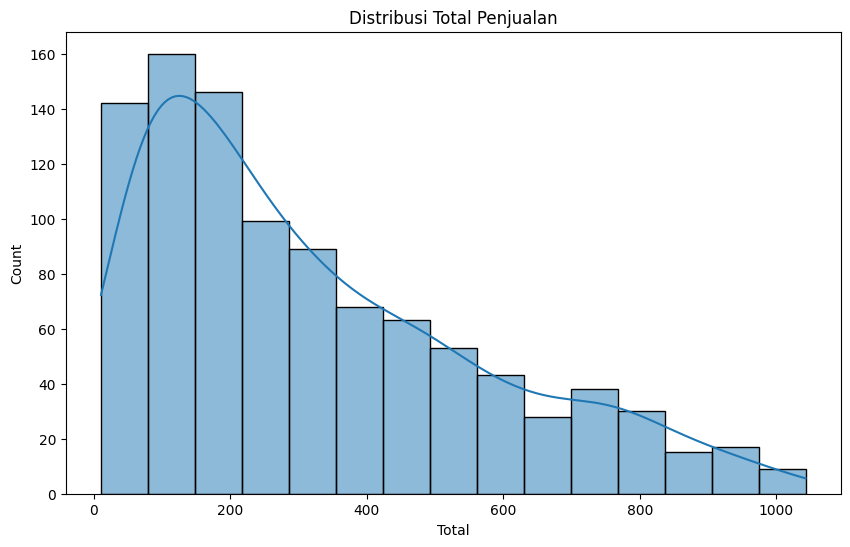

In [17]:
# Distribusi Total Penjualan
plt.figure(figsize=(10,6))
sns.histplot(data['Total'], kde=True)
plt.title('Distribusi Total Penjualan')
plt.show()

Penjelasan Kode:

Memuat Data:

Dataset diunduh dari Kaggle dan dimuat menggunakan pd.read_csv.
Menampilkan beberapa baris pertama untuk memastikan data terload dengan benar.
Pre-processing:

Mengubah kolom 'Date' menjadi tipe data datetime.
Menambahkan kolom 'Day', 'Month', dan 'Year' untuk analisis lebih lanjut.


---


Association Rule Mining:

Membuat basket (keranjang) untuk setiap transaksi berdasarkan 'Invoice ID' dan 'Product line'.
Mengubah data kuantitas menjadi format biner untuk algoritma Apriori.
Menerapkan algoritma Apriori untuk menemukan itemset yang sering muncul.
Menghasilkan aturan asosiasi menggunakan metrik lift.


---


Regresi Linear:

Memilih fitur yang relevan dan variabel target ('Total').
Membagi data menjadi set pelatihan dan pengujian.
Membangun model regresi linear dan menyesuaikannya dengan data pelatihan.
Melakukan prediksi pada data pengujian.
Mengevaluasi model menggunakan Mean Squared Error dan R-squared Score.


---


Visualisasi:

Membuat scatter plot untuk membandingkan nilai aktual dan prediksi.
Menampilkan distribusi total penjualan.